In [2]:
import pandas as pd

import torch
from torch import nn

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import import_ipynb
import prepareData as prep
import model as md

importing Jupyter notebook from prepareData.ipynb
importing Jupyter notebook from model.ipynb


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
#device = "cpu"
print(f"Rodando {device}")

Rodando cuda


In [4]:
n_features = 7
n_output = 1
learning_rate = 0.01
batch_size = 16

In [5]:
train_csv_name = 'train.csv'
test_csv_name = 'test.csv'
scaler = StandardScaler()
train_dataloader = prep.prepare_data(train_csv_name, 0, batch_size, scaler)
X_test, passengers_id = prep.prepare_data(test_csv_name, 1, 0, scaler)
print(type(X_test))

<class 'torch.Tensor'>


In [6]:
model = md.LogisticRegression(n_features, n_output).to(device)


In [7]:
lossfunc = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
def plot_losses(losses):
  fig = plt.figure(figsize=(13, 5))
  ax = fig.gca()
  for loss_name, loss_values in losses.items():  
    ax.plot(loss_values, label=loss_name)
  ax.legend(fontsize="16")
  ax.set_xlabel("Iteration", fontsize="16")
  ax.set_ylabel("Loss", fontsize="16")
  ax.set_title("Loss vs iterations", fontsize="16");

In [9]:
def train(model, dataloader, lossfunc, optimizer):
  model.train()
  cumloss = 0.0

  for X, Y in dataloader:
    
    X = X.unsqueeze(1).float().to(device)
    Y = Y.unsqueeze(1).float().to(device)
    pred = model(X)
    loss = lossfunc(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cumloss += loss.item()

  return cumloss / len(dataloader)

Epoch: 0; Train Loss: 0.599566675722599
Epoch: 10; Train Loss: 0.46986391821077894
Epoch: 20; Train Loss: 0.4512434194662741
Epoch: 30; Train Loss: 0.44401703934584347
Epoch: 40; Train Loss: 0.44241843319364954
Epoch: 50; Train Loss: 0.44780443103185724
Epoch: 60; Train Loss: 0.44232571630605627
Epoch: 70; Train Loss: 0.4411599710583687
Epoch: 80; Train Loss: 0.44375678870294777
Epoch: 90; Train Loss: 0.4411342008305447
Epoch: 100; Train Loss: 0.4420317951589823
Epoch: 110; Train Loss: 0.44301829433866907
Epoch: 120; Train Loss: 0.4412234420222895
Epoch: 130; Train Loss: 0.4427333125578506
Epoch: 140; Train Loss: 0.4418999707060201
Epoch: 150; Train Loss: 0.4402733181736299
Epoch: 160; Train Loss: 0.4411041337464537
Epoch: 170; Train Loss: 0.44330313775156227
Epoch: 180; Train Loss: 0.44516166272972313
Epoch: 190; Train Loss: 0.4432065047855888
Epoch: 200; Train Loss: 0.4394131113908121
Epoch: 210; Train Loss: 0.43994566638554844
Epoch: 220; Train Loss: 0.44363691232034136
Epoch: 230; 

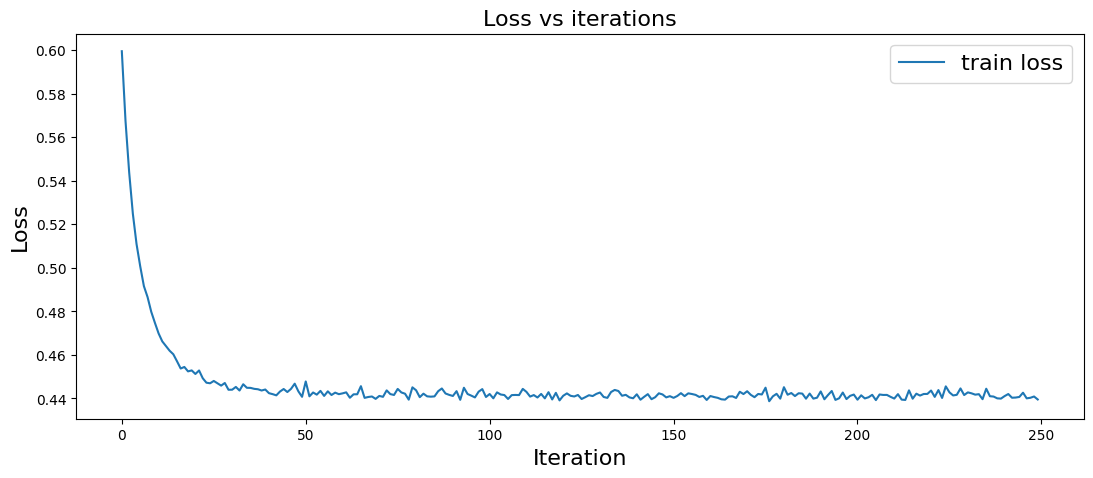

In [10]:
epoch = 250
train_losses = []

for t in range(epoch):
  train_loss = train(model, train_dataloader, lossfunc, optimizer)
  if t  % 10 == 0:
    print(f"Epoch: {t}; Train Loss: {train_loss}")
  train_losses.append(train_loss)

losses = {"train loss": train_losses}
plot_losses(losses)

In [11]:
with torch.no_grad():
    model.eval()
    pred = model(X_test.float()).detach().cpu().numpy().round().flatten()
    result = pd.DataFrame({'PassengerId': passengers_id, 'Survived': pred.astype(int)})
    result.to_csv('result.csv', index=False)
